<a href="https://colab.research.google.com/github/hyeonzz/ESAA_24-1_OB/blob/writing/0311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **3/11 과제 - 핸즈온 4장 모델 훈련 p.157-202**

##Chapter4. 모델 훈련
#### 1. 선형회귀
- 직접 계산할 수 있는 공식을 사용(훈련 세트에 가장 잘 맞는 모델 파라미터를 구함)
- 경사 하강법: 반복적으로 모델 파라미터를 바꾸어나가면서 비용함수를 훈련 세트에 대해 최소화시킴. 경사 하강법, 미니배치 경사 하강법, 확률적 경사 하강법 등이 있음.
#### 2. 비선형 회귀
- 다항 회귀: 선형회귀보다 파라미터가 많아 훈련 데이터에 과대적합될 위험이 큼. 따라서 학습 곡선을 이용해 모델의 과대적합을 감지하는 방법도 살펴볼 것. + 과대적합 감소 방법인 규제 기법들을 살펴봄.
#### 3. 분류
- 로지스틱 회귀
- 소프트맥스 회귀

###**4.1 선형회귀**
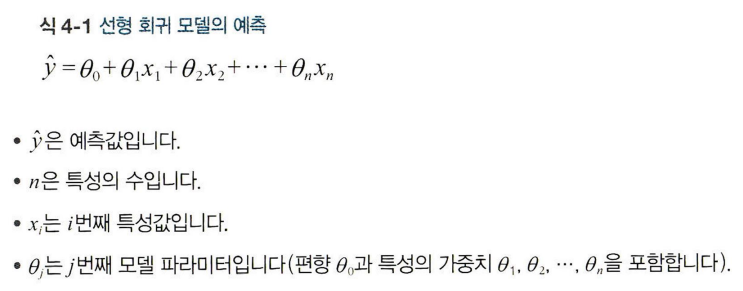

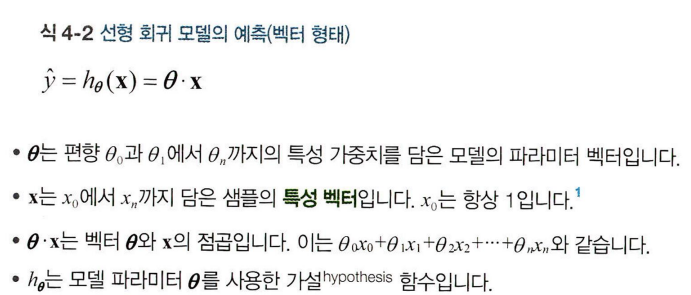

모델 훈련: 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정함.  
-> 모델이 훈련 데이터에 잘 맞는지 측정하기 위해 성능 측정 지표를 사용하는데, 회귀에서는 평균 제곱근 오차(RMSE)가 많이 쓰임. 즉, RMSE를 최소화하는 $\theta$를 찾아야함.  
-> 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 계산도 더 간단함.
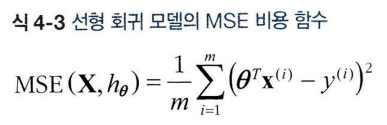

####**4.1.1 정규방정식**
정규방정식: 비용 함수를 최소화하는 $\theta$를 찾기 위한 공식    
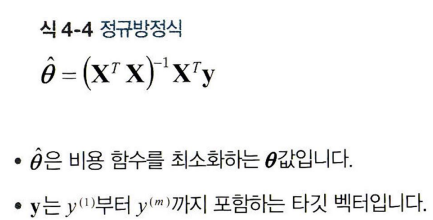

In [1]:
#데이터 생성 y=4+3x1+가우시안_잡음
import numpy as np

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

Text(0, 0.5, 'y')

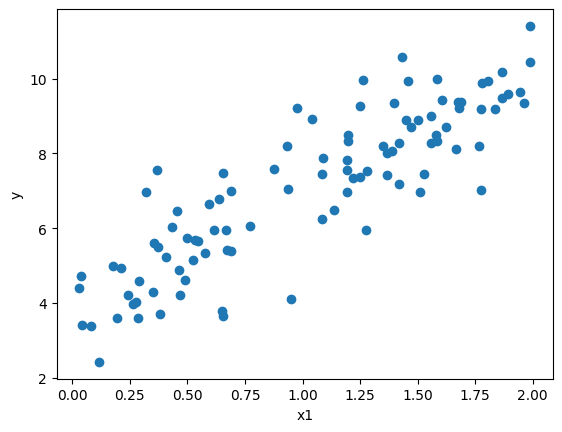

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('x1')
plt.ylabel('y')

In [3]:
X_b = np.c_[np.ones((100,1)), X]  #모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
X_b

array([[1.        , 1.39036946],
       [1.        , 0.46726435],
       [1.        , 0.35331872],
       [1.        , 1.2818576 ],
       [1.        , 1.80510051],
       [1.        , 1.55989722],
       [1.        , 0.21226917],
       [1.        , 1.52969746],
       [1.        , 1.41857455],
       [1.        , 1.08912736],
       [1.        , 1.78036217],
       [1.        , 0.6894054 ],
       [1.        , 0.67291875],
       [1.        , 1.13758006],
       [1.        , 0.49757421],
       [1.        , 1.39535767],
       [1.        , 1.60531994],
       [1.        , 1.8683547 ],
       [1.        , 0.17613069],
       [1.        , 1.5848207 ],
       [1.        , 1.19248918],
       [1.        , 1.04057553],
       [1.        , 0.64801227],
       [1.        , 1.44816437],
       [1.        , 1.34791371],
       [1.        , 0.08270517],
       [1.        , 1.77515708],
       [1.        , 1.4327724 ],
       [1.        , 1.86510992],
       [1.        , 1.27490832],
       [1.

In [5]:
theta_best
#[[4],[3]]을 기대했지만 잡음 때문에 정확하진 않음.

array([[3.84926593],
       [3.14513979]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  #모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84926593],
       [10.13954552]])

In [7]:
print(X_new)
print(X_new_b)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


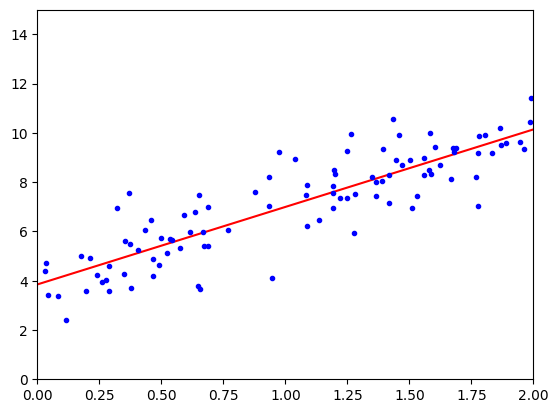

In [8]:
#모델 예측을 그래프로
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
#사이킷런에서 선형회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_ )
print(lin_reg.predict(X_new))

[3.84926593] [[3.14513979]]
[[ 3.84926593]
 [10.13954552]]


In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.84926593],
       [3.14513979]])

In [11]:
#유사역행렬
np.linalg.pinv(X_b).dot(y)

array([[3.84926593],
       [3.14513979]])

유사역행렬: 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산됨.

####**4.1.2 계산 복잡도**
- 학습된 선형 회귀 모델은 예측이 빠름


###4.2 경사 하강법
- 경사 하강법: 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해 최적의 해법을 찾으려 함.   
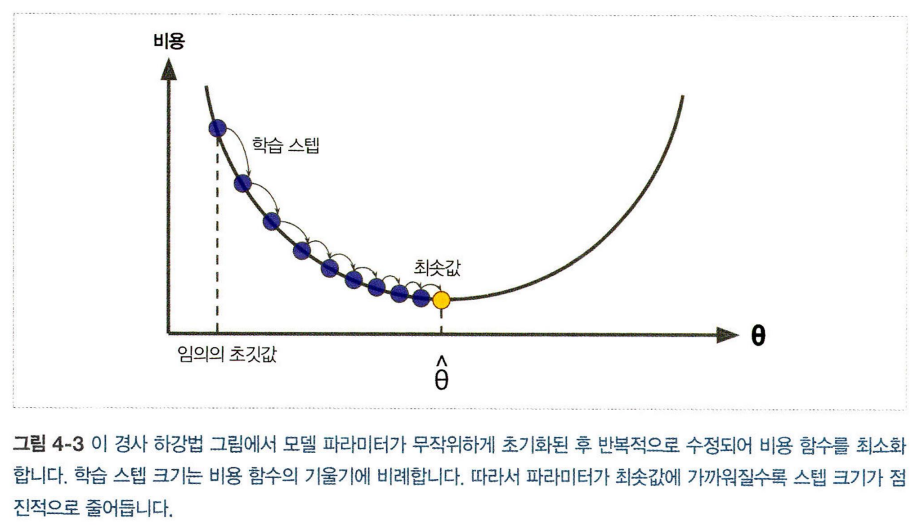

중요 파라미터: 스텝의 크기 -> 학습률로 결정됨.   
학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해 시간이 오래 걸림.
학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰어 더 높은 곳으로 올라갈 수 있음. 이는 알고리즘을 더 큰 값으로 발산하게 만듦.   
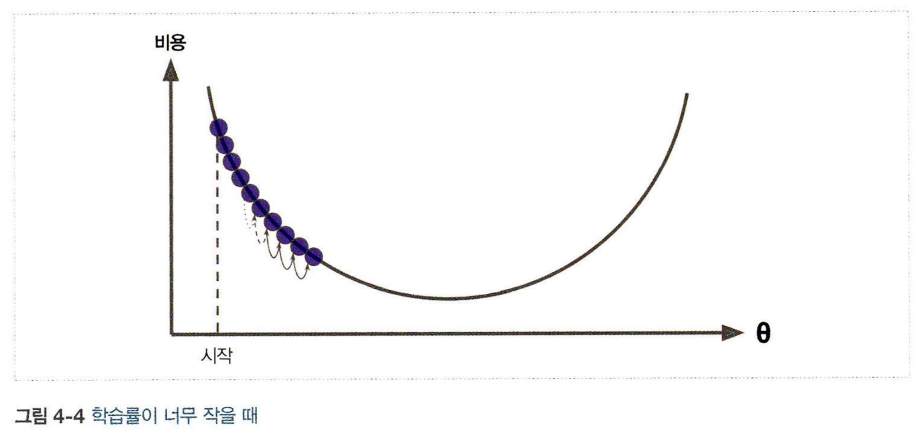     
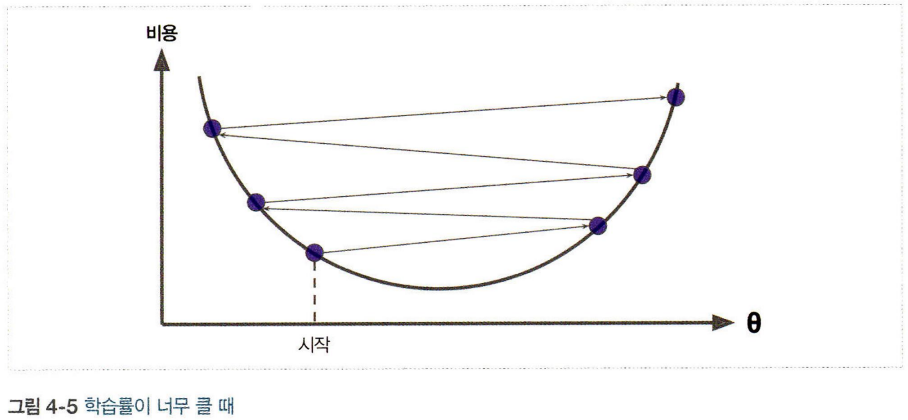

#### **4.2.1 배치 경사 하강법**  
- 편도 함수: 각 모델 파라미터 $\theta_j$ 가 조금 변경될 때 비용함수가 얼마나 바뀌었는지 계산해줌.   
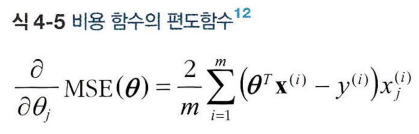   
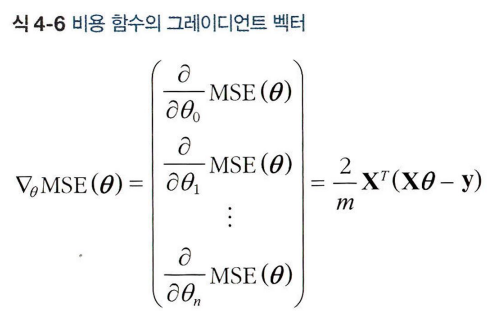

##### 내려가는 스텝의 크기 결정
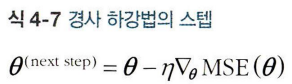

In [12]:
#위 알고리즘 구현
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta *gradients

In [13]:
theta  # 정규방정식으로 찾은 것과 똑같음.

array([[3.84926593],
       [3.14513979]])

##### 세 가지 다른 학습률을 사용하여 진행한 경사 하강법의 스텝    
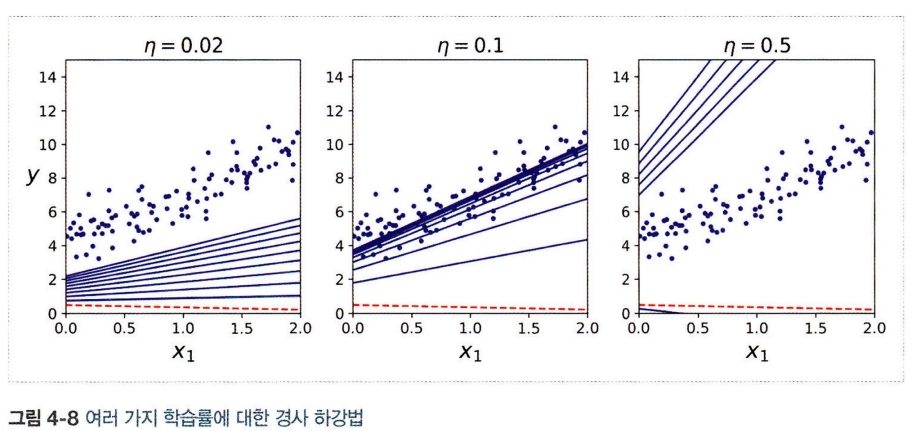
- 왼쪽: 학습률이 매우 낮음,  알고리즘이 최적점에 도달하는데 시간이 오래 걸걸릴 것  
- 가운데: 학습률 적당, 반복 몇 번 만에 최적점에 수렴
- 오른쪽: 학습률이 너무 높음, 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 더 멀멀어져 발산함.

> 적절한 학습률을 찾기 위해 그리드 탐색을 사용하지만, 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 회수를 제한함.  
-> 반복 횟수 지정: 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면(벡터의 노름 < 허용오차), 경사 하강법이 거의 최솟값에 도달해 알고리즘을 중단함.

####*4.2.2 확률적 경사 하강법**
- 배치 경사 하강법 문제점: 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산함. 훈련 세트가 커질 수록 느려짐
- 확률적 경사 하강법
 - 장점: 매 스텝에서 한 개의 샘플을 무작위로 선택 후 그 하나의 샘플에 대한 그레이디언트를 계산함. 따라서 큰 훈련 세트 훈련도 가능하면서 빠름.
 - 단점: 무작위이기 때문에 배치 경사 하강법보다 불안정함. 비용함수가 최솟값에 다다를 때까지 위아래로 요동치면서 평균적으로 감소함. 최솟값에 근접은 하지만 안착은 하지 못함.(그림 4-9)


- 무작위성은 지역 최솟값에서는 탈출시켜주지만 알고리즘을 전역 최솟값에 다다르지 못하게 함. 이를 해결하는 방법은 학습률을 점진적으로 감소시키는 것임. 시작할 때는 학습률을 크게, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함.  
- 학습 스케줄: 매 반복에서 학습률을 결정하는 함수

In [14]:
#확률적 경사 하강법 구현
n_epochs = 50
t0, t1 = 5, 50  #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1)  #무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients

In [15]:
theta

array([[3.88157216],
       [3.09511737]])

> - 샘플을 무작위로 선택하기 때문에 선택되지 못한 샘플이 있을 수 있음.
> - 알고리즘이 에포크마다 모든 샘플을 사용하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고나서 에포크에 다시 섞는 방법을 사용. -> 더 늦게 수렴

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.79393986]), array([3.09995231]))

####**4.2.3 미니배치 경사 하강법**
- 미니배치 경사 하강법: 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산함.
- 미니배치 경사 하강법 장점: 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해 얻는 성능 향상.
- 미니배치를 어느 정도 크게 하면, SGD보다 덜 불규칙하게 움직여 최솟값에 더 가까이 도달할 것. 하지만 지역 최솟값에 빠져나오기는 더 어려울 수 있음.

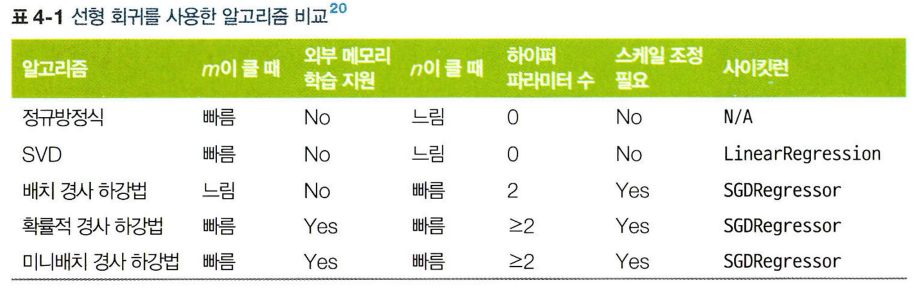

###**4.3 다항 회귀**
- 비선형 데이터를 학습하는 데 각 특성의 거듭제곱을 새로운 특성으로 추가해 이를 포함한 데이터셋에 선형 모델을 훈련시킴

In [18]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X**2 + X +2 + np.random.rand(m,1)

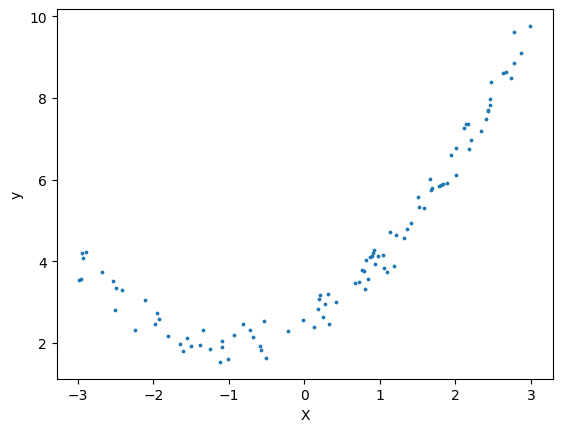

In [19]:
plt.scatter(X,y, s=3)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.23717993]
[-2.23717993  5.00497403]


In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.55928186]), array([[0.98953634, 0.48962342]]))

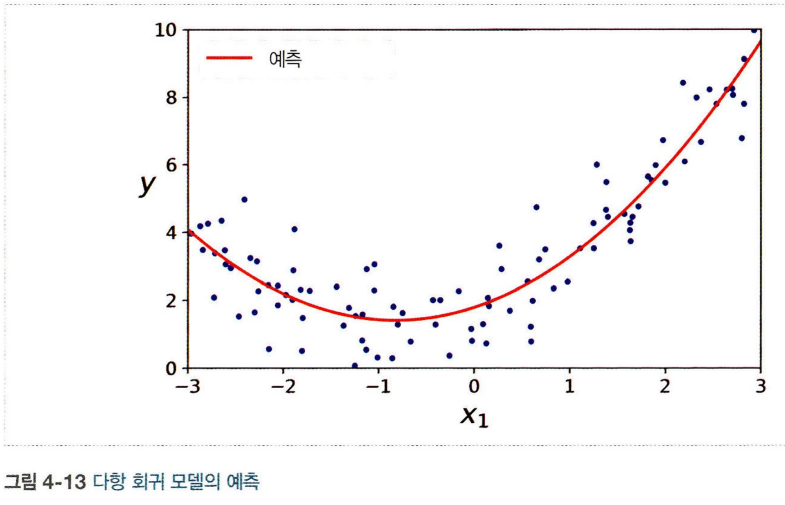

- 특성이 여러 개일 때 다항회귀는 이 특성 사이의 관계를 찾을 수 있음.

###**4.4 학습 곡선**
- 고차 다항 회귀는 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려함.    
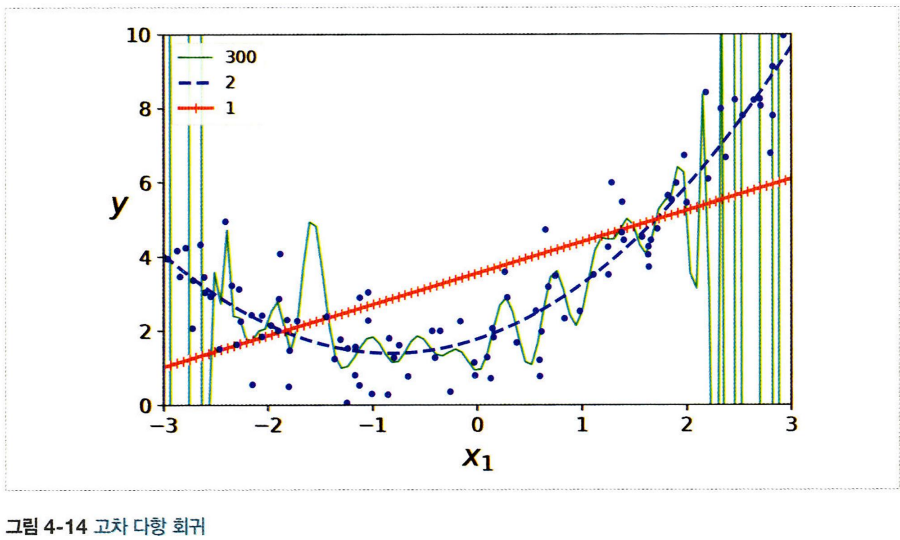    
- 고차 다항 회귀 모델: 훈련 데이터에 과대적합 (훈련데이터에서 성능 good, 교차 검증 점수 bad)-복잡
- 선형모델: 과소적합(훈련데이터에서 성능 bad, 교차 검증 점수 bad)-단순


##### 학습 곡선 살펴보기
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄.
- 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

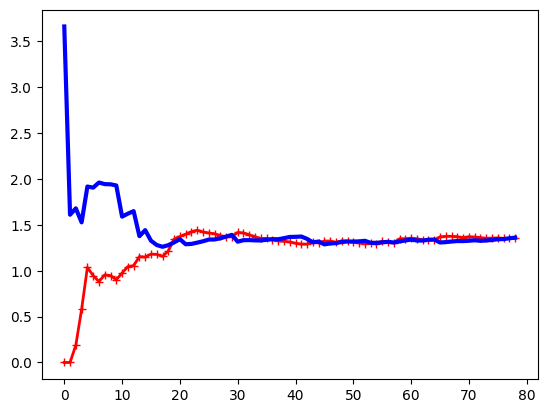

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

#####  과소적합된 모델(위)
- 훈련 데이터 성능
 - 그래프가 0에서 시작하므로 훈련 세트가 하나 or 두 개의 샘플일 땐 모델이 완벽하게 작동함.
 - 하지만 샘플이 추가됨에 따라 잡음 및 비선셩 때문에 완벽히 학습이 불가능해짐. 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승함.
 - 더 이상의 위치에서는 샘플이 추가되어도 평균 오차가 크게 달라지지 않음.
- 검증 데이터 성능
 - 적은 수의 샘플일 때는 제대로 일반화될 수 없어 검증 오차가 초기에 큼.
 - 샘플이 추가됨에 따라 학습이 되고 오차가 감소함.
 - 선형 회귀 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져 훈련 세트의 그래프와 가까워짐

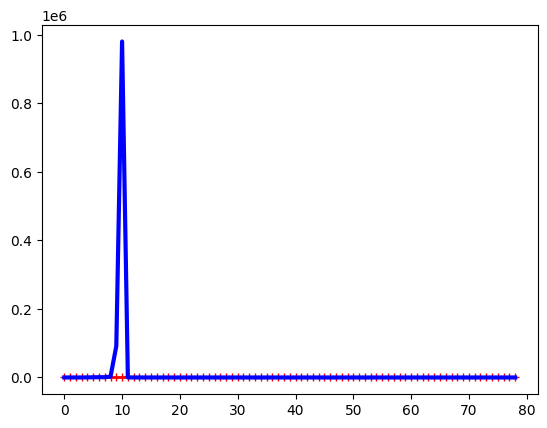

In [24]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

##### 이전과의 차이점
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 곡선 사이에 공간이 있음. 즉, 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고 이는 과대적합 모델의 특징임.
- tip: 과대적합 모델을 개선하는 방법 중 하나는 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가함.


##### 편향/분산 트레이드오프
- 편향: 예를 들어 실제 데이터는 2차인데 선형으로 가정하는 경우... 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움
- 분산: 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남. 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있음
- 줄일 수 없는 오차: 데이터 자체의 잡음 때문에 발생. 이 오차를 줄일 수 있는 유일한 방법은 잡음을 제거하는 것.
- -> 모델의 복잡도 커 -> 분산 늘어 -> 편향 줄어
- -> 모델의 복잡도 작 -> 분산 줄어 -> 편향 늘어
- => 따라서 트레이드오프라 함.

###**4.5 규제가 있는 선형 모델**
- 과대적합을 감소시키는 방법으로 모델을 규제하는데, 다항 회귀 모델을 규제하는 간단한 방법은 차수를 감소시키는 것이다.
- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가하는데 그 방법에 따라 '릿지'회귀, '라쏘'회귀, 엘라스틱넷이 있음.

####**4.5.1 릿지 회귀**
- 규제가 추가된 선형 회귀 버전으로, 규제항이 비용함수에 추가됨. 이는 학습 알고리즘을 데이터에 맞추는 것뿐 아니라 모델의 가중치가 가능한 한 작게 유지되도록 함.
- 훈련이 끝나면 모델의 성능을 규제 없는 성능 지표로 평가함.

- 하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절.
 - $\alpha$=0 이면, 릿지회귀 = 선형회귀
 - $\alpha$ 가 엄청 크면, 모든 가중치가 거의 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨.
- 편향 $\theta_0$는 규제되지 않음.   
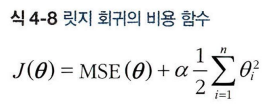


!Tip: 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요!!! 규제가 있는 모델의 대부분이 마찬가지임!


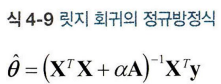

In [25]:
#정규방정식을 사용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.54691481]])

In [26]:
#경사하강법을 사용
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.52210402])

####**4.5.2 라쏘 회귀**
- 비용 함수에 규제항을 더하지만, 가중치 벡터의 l1의 노름을 사용   
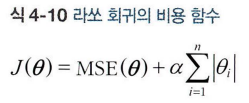

##### 라쏘 회귀의 특징
- 덜 중요한 특정의 가중치를 제거하려고 함. 즉, 가중치가 0이 됨.

In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.51153369])

In [28]:
#Lasso 대신 SGDRegressor(penalty="l1")을 사용할 수도 있음

####**4.5.3 엘라스틱넷**
- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하고, 혼합 정도는 혼합 비율 r을 사용해 조절
- r=0이면 릿지 회귀, r=1이면 라쏘 회귀와 같음.  
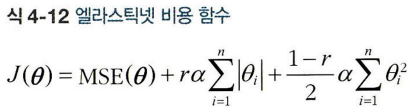

##### 규제가 없는 모델의 선형 회귀, 릿지, 라쏘, 엘라스틱넷을 언제 사용할까?
- 규제가 약간 있는 것이 대부분 좋으므로 일반적으로 평범한 선형 회귀는 x
- 릿지가 기본이지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 나음. (라쏘와 엘라스틱넷은 불필요한 특성의 가중치를 0으로 만들어주기 때문)
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘보다는 엘라스틱넷이 나음.


In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.51219172])

####**4.5.4 조기 종료**
- 조기종료: 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 방식으로 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것

In [30]:
#조기 종료를 위한 기본적인 구현 코드
'''
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
'''

'\nfrom sklearn.base import clone \nfrom sklearn.preprocessing import StandardScaler\n\n#데이터 준비 \npoly_scaler = Pipeline([\n    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), \n    ("std_scaler", StandardScaler()) \n])\nX_train_poly_scaled = poly_scaler.fit_transform(X_train)\nX_val_poly_scaled = poly_scaler.transform(X_val) \n\nsgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, \n                       penalty=None, learning_rate="constant", eta0=0.0005)\n\nminimum_val_error = float("inf")\nbest_epoch = None\nbest_model = None\nfor epoch in range(1000): \n  sgd_reg.fit(X_train_poly_scaled, y_train) \n  y_val_predict = sgd_reg.predict(X_val_poly_scaled) \n  val_error = mean_squared_error(y_val, y_val_predict) \n  if val_error < minimum_val_error: \n    minimum_val_error = val_error\n    best_epoch = epoch \n    best_model = clone(sgd_reg)\n'

In [31]:
# warm_start=True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감.

###**4.6 로지스틱 회귀**
- 분류, 샘플이 특정 클래스에 속할 확률을 추정함.

####**4.6.1 확률 추정**
- 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계싼한 후 편향을 더해 작동함. 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력함.

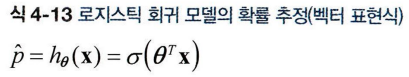

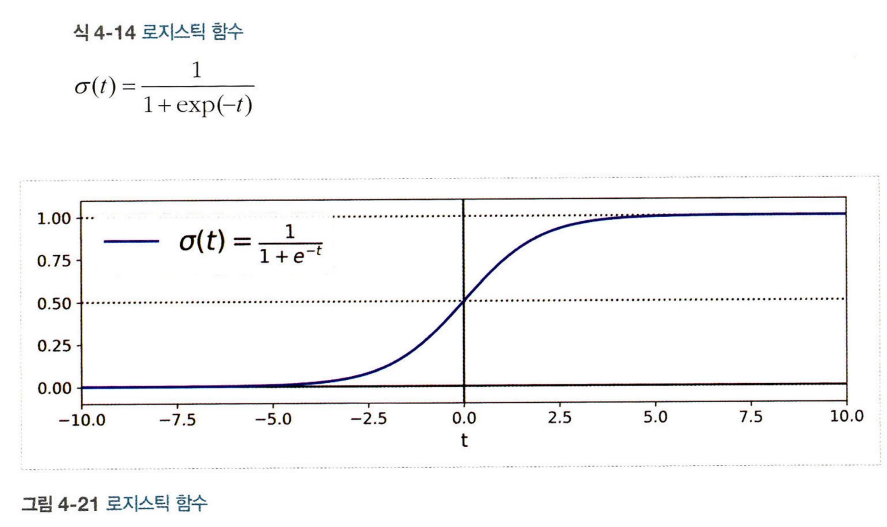

- t<0 이면 $\sigma$(t)<0.5이고, t>=0 이면 $\sigma$(t)>=0.5이므로 로지스틱 회귀 모델은 $\theta^Tx$가 양수일 때 1(양성 클래스)이라고 예측하고, 음수일 때 0(음성 클래스)이라고 예측함.

####**4.6.2 훈련과 비용 함수**
- 훈련의 목적, 양성 샘플($y$=1)에 대해서는 높은 확률을 추정하고 음성 샘플($y$=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것임.

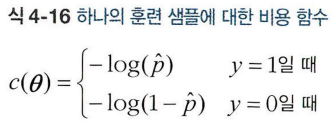     
- $t$가 0에 가까워지면 -$log(t)$가 매우 커짐.
 - 모델이 양성 샘플을 0에 가까운 확률로 추정하거나 음성 샘플을 1에 가까운 확률로 추정하면 비용이 증가할 것
- $t$가 1에 가까우면 -$log(t)는 0에 가까워짐.
 - 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워질 것  

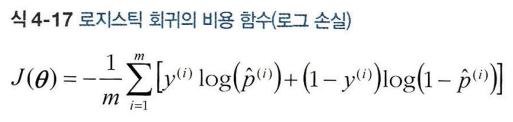   
- 이 비용함수의 최솟값을 계산하는 알려진 해는 없음.
- 하지만 경사하강법을 사용하여 전역 최솟값을 찾을 수 있음.


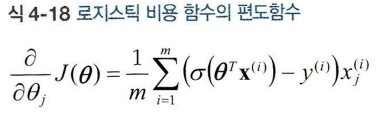     
- 각 샘플에 대해 예측 오차를 계산하고 $j$번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 냄.

####**4.6.3 결정 경계**

In [32]:
#붓꽃 데이터셋
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [33]:
X = iris["data"][:,3:]  #꽃잎의 너비
y = (iris["target"]==2).astype(int)   #1 Iris-Virginica면 1, 그렇지 않으면 0

In [34]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

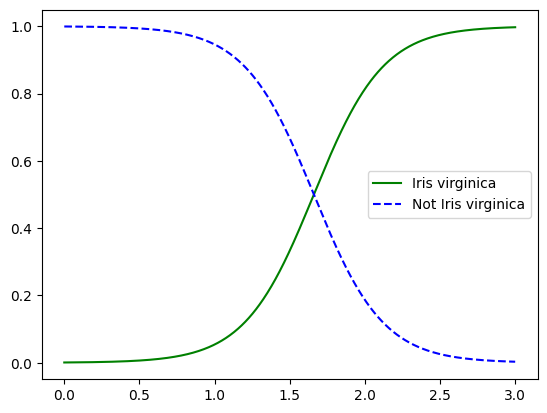

In [35]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)   #0~3값을 1000개 만들고 reshape함
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris virginica")
plt.legend()

In [37]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

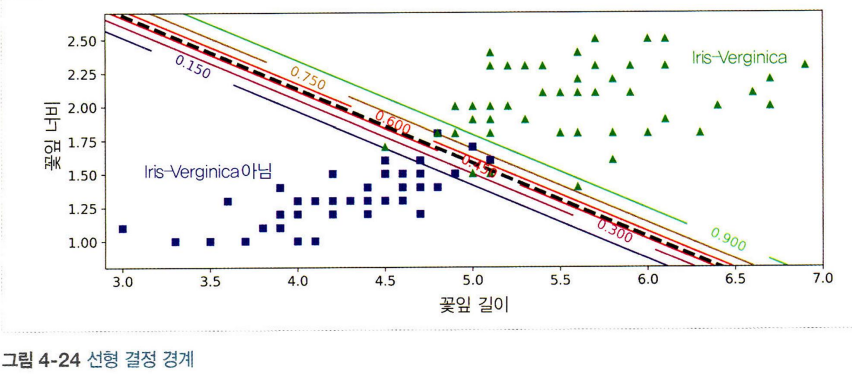

- 점선은 모델이 50% 확률을 추정하는 지점으로, 이 모델의 결정 경계입니다. 이 경계는 선형임!
- 15%(왼쪽 아래)부터 90%(오른쪽 위)까지 수평한 직선들은 모델이 특정 확률을 출력하는 포인트를 나타냄.
- 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 090% 이상의 확률로 Iris-Virginica라고 판단할 것.
- 다른 선형 모델처럼 로지스틱 회귀 모델 $l_1$,$l_2$ 페널티를 사용하여 규제할 수 있음. 사이킷런은 $l_2$ 페널티가 기본임.

####**4.6.3 소프트맥스 회귀**
- 소프트맥스 회귀 or 다항 로지스틱 회귀: 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음.
- 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정함.   
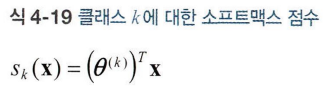

- 샘플 $x$에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 $k$에 속할 확률 $\hat p_k$을 추정할 수 있음. 이 함수는 각 점수에 지수 함수를 적용한 후 정규화함. 이 점수를 로짓 또는로그-오즈라고 부름

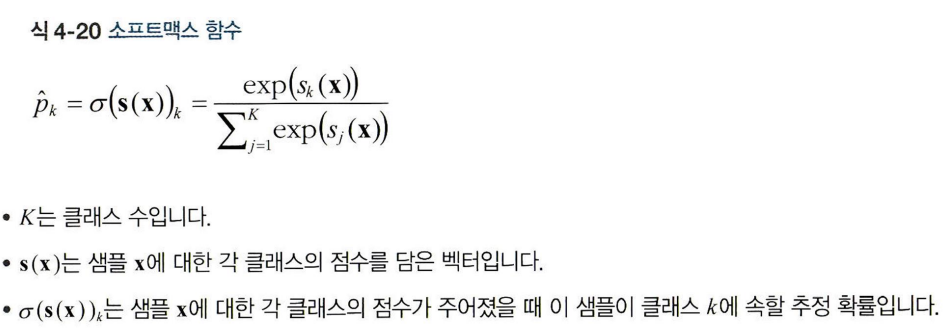

- 소프트맥스 회귀 분류기도 로지스틱 회귀 분류기와 같이 추정 확률이 가장 높은 클래스(점수가 제일 높은 클래스)를 선택함.

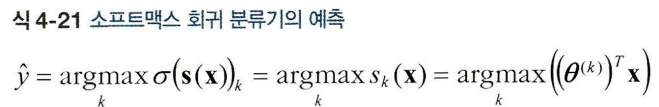

- 훈련
- 훈련의 목적은 모델이 타깃 클래스에 대해서만 높은 확률을 추정하도록 만드는 것. 이를 위해 크로스 엔트로피 비용 함수를 최소화해 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제함.
- 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용됨.    
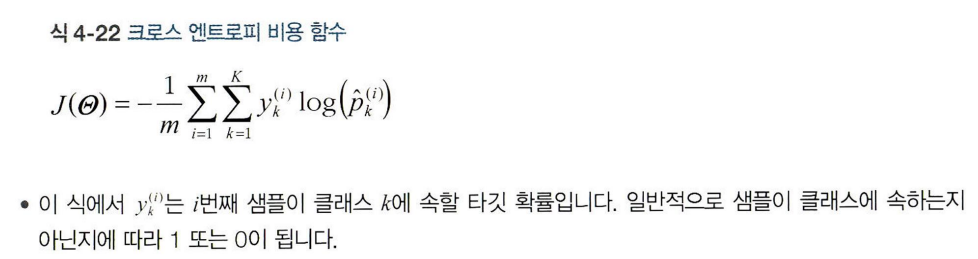


- 두 개의 클래스만 있을 때($K$=2) 이 비용 함수는 로지스틱 회귀 비용함수와 같음.

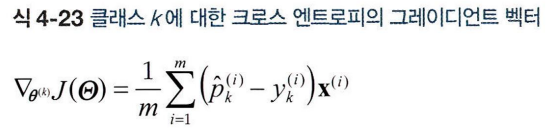

- 각 클래스에 대한 그레이디언트 벡터를 계산ㅎㄹ 수 있으므로 비용함수를 최소화하기 위해 파라미터 행렬을 찾기 위해 경사 하강법 등을 사용할 수 있음.

In [38]:
X = iris["data"][:,(2,3)]  #꽃잎 길이, 꽃잎 너비
y = iris["target"]

#multinomial로 바꾸면 소프트맥스 회귀 사용
#solver 매개 변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야함
#하이퍼파라미터 C를 사용하여 조절할 수 있는 l2규제가 사용됨
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [39]:
#꽃잎의 길이 5cm, 너비 2cm인 붓꽃의 품종 예측
softmax_reg.predict([[5,2]])

array([2])

In [40]:
#94.2%확률로 Iris-Virginica(클래스 2)
#5.8%확률로 Iris-Versicolor(클래스 1)
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])